#### Load in the Auto  dataset: 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [4]:
Auto_df = pd.read_csv("Auto.csv")
Auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Use the lm() function to perform a simple linear regression with **mpg** as the response and **horsepower** as the predictor.

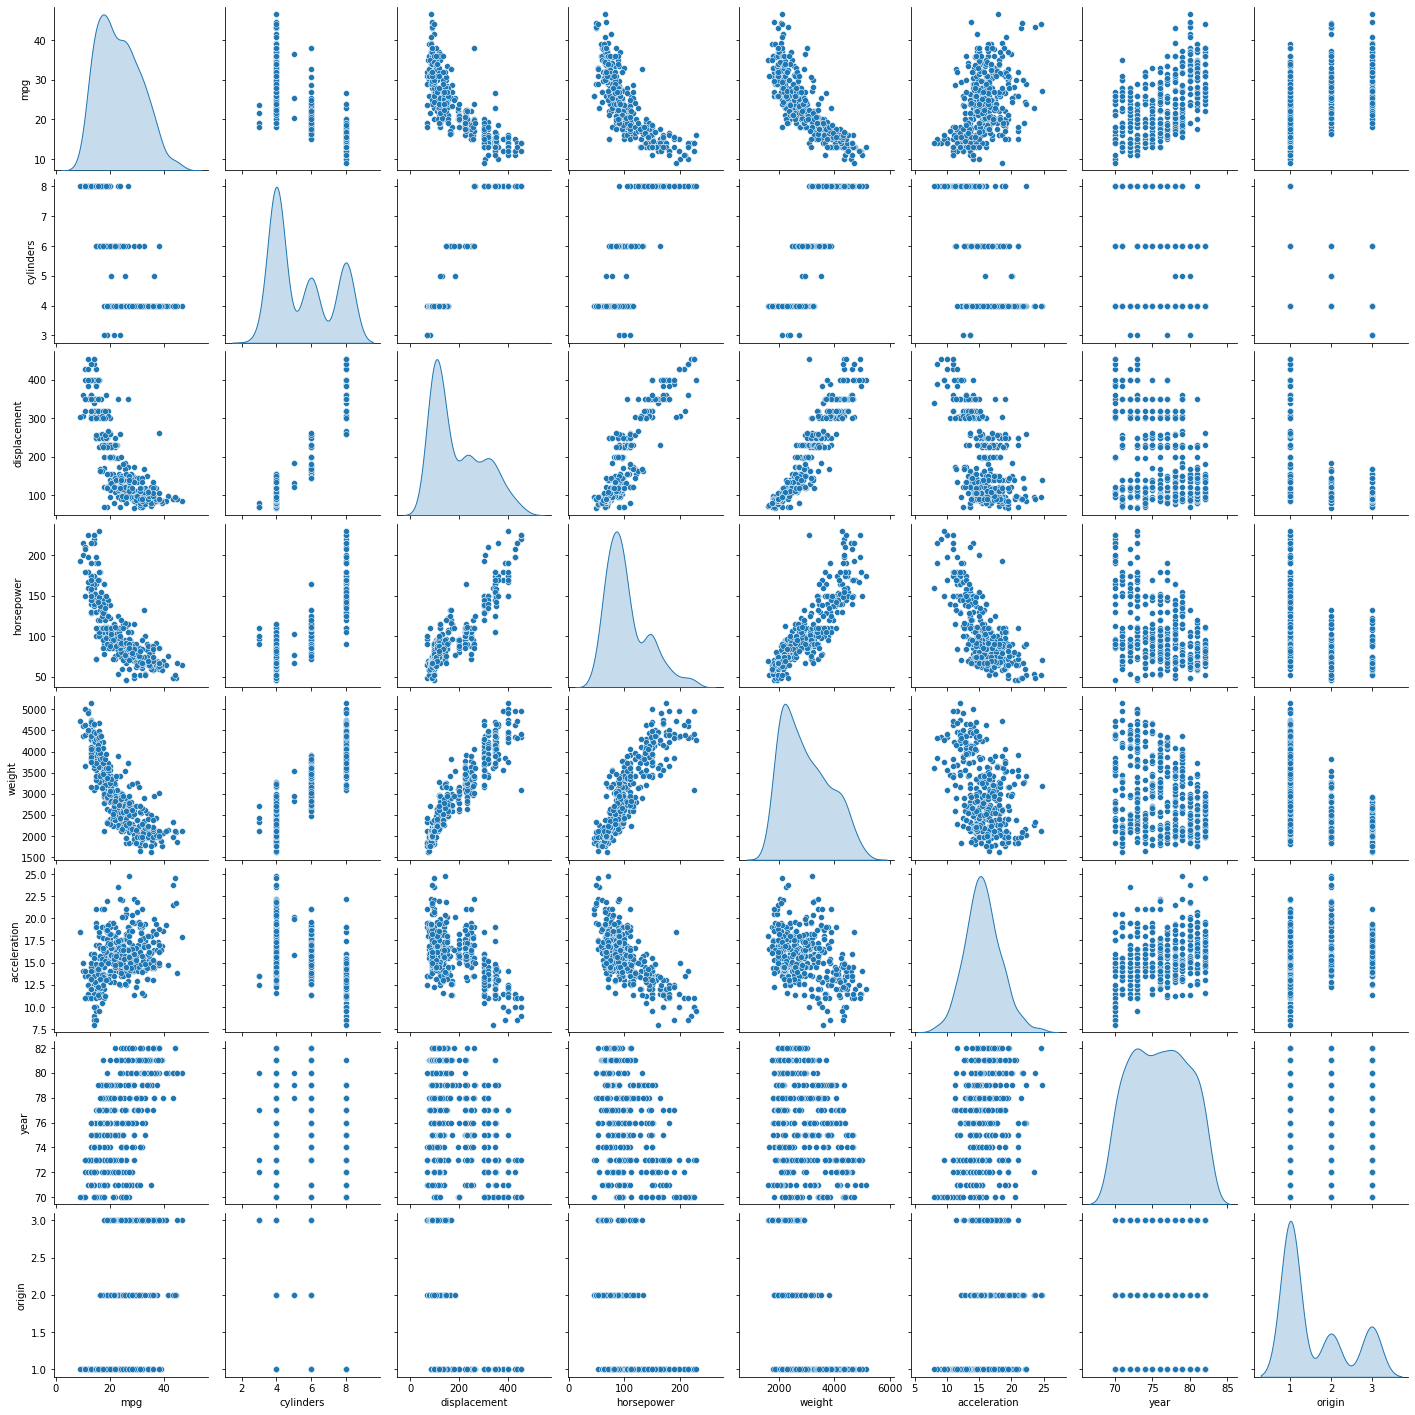

In [5]:
sns.pairplot(Auto_df, diag_kind='kde')

<AxesSubplot:>

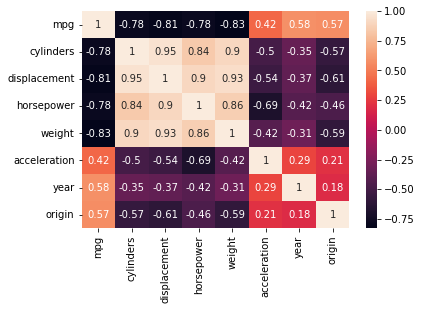

In [6]:
correlation_matrix = Auto_df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [19]:
from sklearn.model_selection import train_test_split

X = Auto_df['horsepower']
y = Auto_df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

X_train = np.array(X_train).reshape((len(X_train), 1))
y_train = np.array(y_train).reshape((len(y_train), 1))

X_test = np.array(X_test).reshape((len(X_test), 1))
y_test = np.array(y_test).reshape((len(y_test), 1))

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [21]:
def evaluation():
  # model evaluation for training set
    y_train_predict = lin_model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(y_train_predict, y_train)))
    r2 = r2_score(y_train, y_train_predict)

    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")

    # model evaluation for testing set
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(y_test_predict, y_test)))
    r2 = r2_score(y_test, y_test_predict)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

In [22]:
evaluation()

The model performance for training set
--------------------------------------
RMSE is 4.9426609439870814
R2 score is 0.5955625946891978


The model performance for testing set
--------------------------------------
RMSE is 4.6932278132410925
R2 score is 0.6456234296465988
